In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
import seaborn as sb 

from datatile.summary.df import DataFrameSummary 

sns.set()

pd.options.mode.use_inf_as_na = True
# pd.set_option('')

df = pd.read_csv('data_cleaned\\Data_2-Enhanced.csv')
df = df [ df.Invoice_Status == 'F'][ df.Misc_Product_Code_Flag == False]
DataFrameSummary(df).summary()

c:\Users\sraja\Miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\sraja\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\sraja\Miniconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\sraja\AppData\Local\Temp/ipykernel_43332/2788748361.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df [ df.Invoice_Status == 'F'][ df.Misc_Product_Code_Flag == False]


,Invoice_No,Product_Code,Cust_ID,Invoice_Date,Invoice_Status,Product_Qty,Product_Price,Sale_Value,Misc_Product_Code_Flag,Cust_Country,...,Week,Weekday,Day,Date,Hour,Day_of_Year,Year_Quarter,Year_Month,Year_Week,Year_Day
count,998361.0,NaN,766413.0,NaN,NaN,998361.0,998361.0,998361.0,NaN,NaN,...,998361.0,998361.0,998361.0,NaN,998361.0,998361.0,998361.0,998361.0,998361.0,998361.0
mean,537627.142957,NaN,15319.783904,NaN,NaN,10.881288,3.346295,19.692429,NaN,NaN,...,28.118866,2.710165,15.843256,NaN,13.019679,194.306295,20107.011621,201050.580768,201071.80687,2010631.186341
std,26941.488386,NaN,1693.369712,NaN,NaN,138.621549,4.731042,200.501053,NaN,NaN,...,14.894475,1.979626,8.17854,NaN,2.436876,104.26604,5.830706,57.573939,58.741307,580.515123
min,489434.0,NaN,12346.0,NaN,NaN,-9600.0,0.0,0.0,NaN,NaN,...,1.0,0.0,1.0,NaN,6.0,2.0,20091.0,200901.0,200903.0,2009012.0
25%,514677.0,NaN,13975.0,NaN,NaN,1.0,1.25,4.13,NaN,NaN,...,15.0,1.0,10.0,NaN,11.0,103.0,20102.0,201006.0,201026.0,2010176.0
50%,538116.0,NaN,15240.0,NaN,NaN,4.0,2.1,10.08,NaN,NaN,...,29.0,3.0,15.0,NaN,13.0,200.0,20104.0,201012.0,201049.0,2010344.0
75%,561513.0,NaN,16791.0,NaN,NaN,12.0,4.13,17.7,NaN,NaN,...,42.0,4.0,23.0,NaN,15.0,290.0,20113.0,201107.0,201128.0,2011191.0
max,581587.0,NaN,18287.0,NaN,NaN,80995.0,867.79,168469.593821,NaN,NaN,...,53.0,6.0,31.0,NaN,20.0,357.0,20114.0,201112.0,201152.0,2011344.0
counts,998361,998361,766413,998361,998361,998361,998361,998361,998361,998361,...,998361,998361,998361,998361,998361,998361,998361,998361,998361,998361
uniques,44802,5291,5856,40156,1,999,891,7265,1,43,...,53,7,31,604,15,352,12,36,116,604


Since there are relatively few columns , it is feasible to do a deep dive into each and eavey columnn to understand the information it captures

then we will do bivariate analyses , between numerical columns to check for correlation 


----

to get meaningful visualizations , need to remiove extreme outliers

In [2]:
# numerical columns
col_list =[
    'Product_Qty',
    'Product_Price',
    'Sale_Value' ]

In [3]:
from utils import treatoutliers 
df = treatoutliers(df , columns=col_list, exclusion_fraction = 0.025 , treament='cap')

## Histogram + Distribution detailed study

    make a quick histogram here of all derived parameters ,
    so that we can see whther the data is too narrow or skewed or whatever lets find out
    make a iterator , that goes through a list of all Col names from DF
    analyse the statistical parameters , make sure there not toomany , to or weird instanxces of outliers

In [4]:
colsdf = pd.DataFrame(np.array(list(zip(range(len(col_list)),col_list))))
index = 0

def desc_stats ( index ) :
    x = df[colsdf[1][index]]

    print(index)
    print(x.name)
    print( 'Mode    :  ' , x.mode()   )
    print( 'Mean    :  ' , x.mean()   )
    print( 'Std.Dev :  ' , x.std()    )
    print( 'Median  :  ' , x.median() )
    print()
    print( 'Min     :  ' , x.min()    )
    print( 'Quantile 0.1   :  ' , x.quantile(q=0.1) )
    print( 'Quantile 0.25  :  ' , x.quantile(q=0.25) )
    print( 'Quantile 0.5   :  ' , x.quantile(q=0.5) )
    print( 'Quantile 0.75  :  ' , x.quantile(q=0.75) )
    print( 'Quantile 0.9   :  ' , x.quantile(q=0.9) )
    print( 'Max     :  ' , x.max()    )
    print(np.where(df[colsdf[1][index]] == np.inf))

    print()

    plt.figure(figsize=(20,10))
    plt.rcParams['axes.facecolor'] = 'white'

    #n_bins = 200
    #fig, axs = plt.subplots( 1 , 2 , sharey=True )
    fig, axs = plt.subplots( 1 , sharey=True , figsize=(20,10)) #, tight_layout=True)

    axs = sb.distplot(x , rug=True ,kde=True ,#  bins=n_bins ,
                    rug_kws={"color": "g"},
                    kde_kws={"color": "k", "lw":1, "label": "KDE"},
                    hist_kws={"histtype": "step", "linewidth": 1,
                                "alpha": 1 , "color": "g"})
    axs = sb.kdeplot(x , bw_method=.2, label="bw: 0.2")


    axs.set_title(x.name)
    #ax.set_xticks([0,25,50,75,100])
    axs.set_xlabel(x.name)
    axs.set_ylabel('no. of instances')

    #print(axs)
    plt.show()
    
    return

----------------------------------Product_Qty-----------------------------------
0
Product_Qty
Mode    :   0    1.0
dtype: float64
Mean    :   9.039535799174848
Std.Dev :   15.649732702563194
Median  :   4.0

Min     :   1.0
Quantile 0.1   :   1.0
Quantile 0.25  :   1.0
Quantile 0.5   :   4.0
Quantile 0.75  :   12.0
Quantile 0.9   :   24.0
Max     :   100.0
(array([], dtype=int64),)



c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

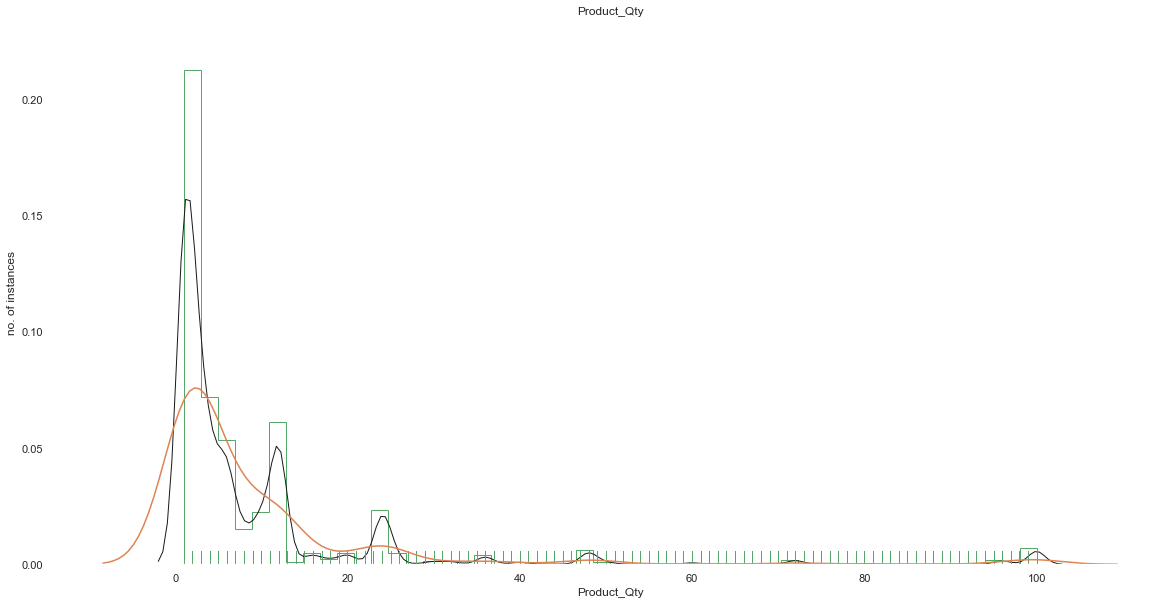

---------------------------------Product_Price----------------------------------
1
Product_Price
Mode    :   0    1.25
dtype: float64
Mean    :   3.232724790934722
Std.Dev :   3.1545360690938993
Median  :   2.1

Min     :   0.21
Quantile 0.1   :   0.65
Quantile 0.25  :   1.25
Quantile 0.5   :   2.1
Quantile 0.75  :   4.13
Quantile 0.9   :   7.62
Max     :   16.63
(array([], dtype=int64),)



c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

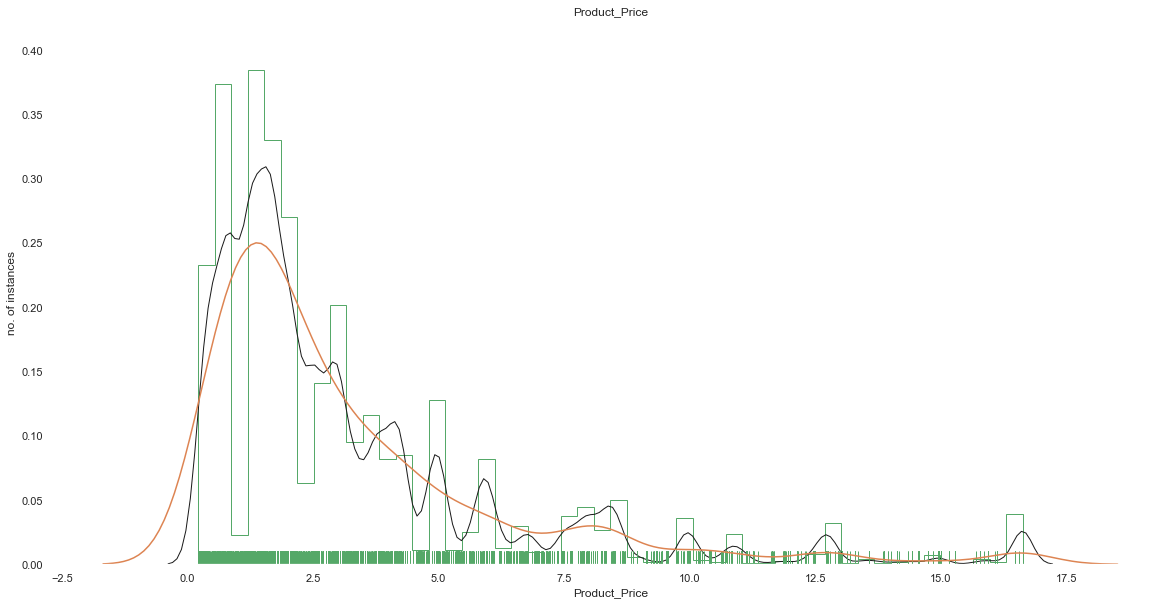

-----------------------------------Sale_Value-----------------------------------
2
Sale_Value
Mode    :   0    15.0
dtype: float64
Mean    :   16.79364289422018
Std.Dev :   25.274346197549033
Median  :   10.079999685287476

Min     :   0.550000011920929
Quantile 0.1   :   1.7000000476837158
Quantile 0.25  :   4.130000114440918
Quantile 0.5   :   10.079999685287476
Quantile 0.75  :   17.700000286102295
Quantile 0.9   :   32.99999952316284
Max     :   164.9999976158142
(array([], dtype=int64),)



c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\sraja\Miniconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<Figure size 1440x720 with 0 Axes>

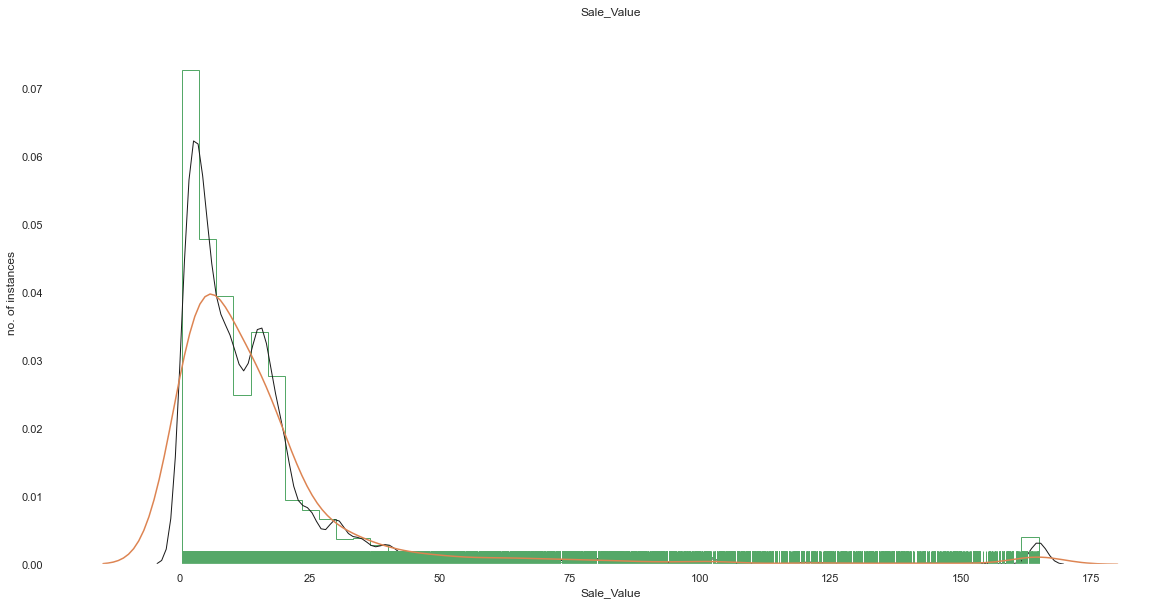

In [5]:
for i in range(len(col_list)):
    print( str(col_list[i]).center(80,'-'))
    desc_stats ( i )

----

## Correlation

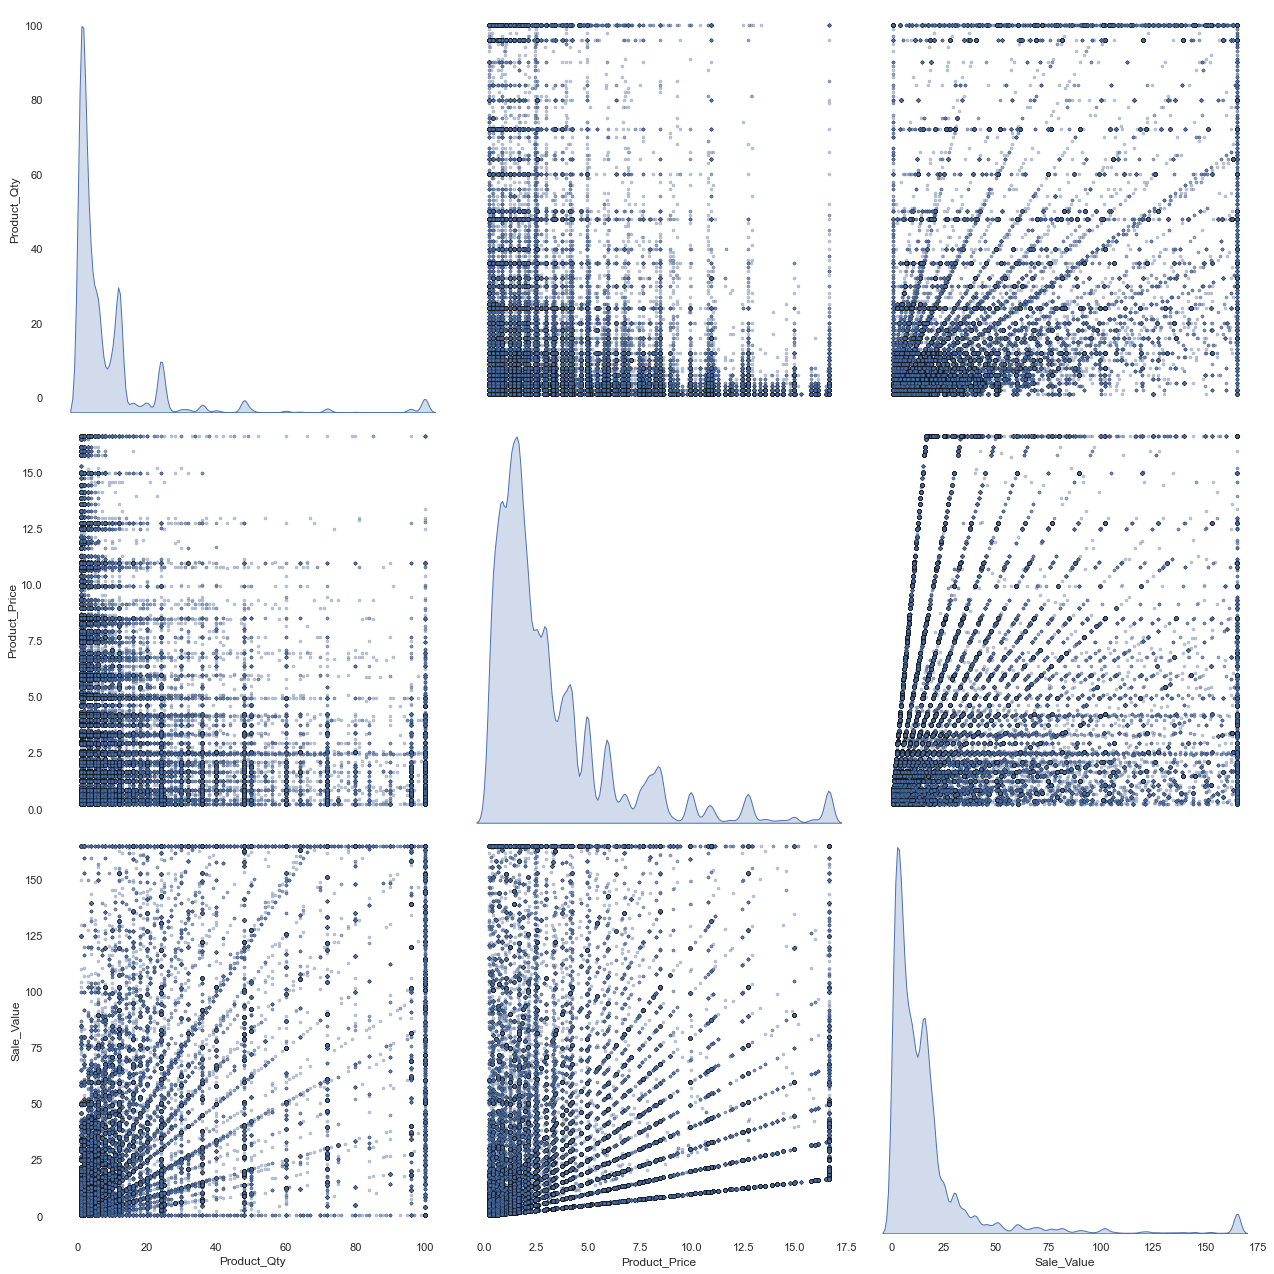

In [6]:
sb.pairplot(df[col_list], 
             #hue = 'old_phase_country', 
            
             diag_kind = 'kde', # 'hist'
             #plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             plot_kws = {'alpha': 0.4, 's': 10 , 'edgecolor': 'k'},
             diag_kws = {#'bins': 50 ,
                         #'histtype':'barstacked' ,
                         #'stacked': False 
                        },
             height = 6
             )